In [1]:
import anndata as ad
import scanpy as sc
sc_file="D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset6\Scdata_filter.h5ad"
adata1 = ad.read_h5ad(sc_file)
adata=adata1.copy()
adata


AnnData object with n_obs × n_vars = 1926 × 1575
    obs: 'label', 'n_genes', 'celltype_num', 'cell_p_balanced'
    uns: 'celltype2num', 'marker', 'rank_genes_groups'
    layers: 'norm'

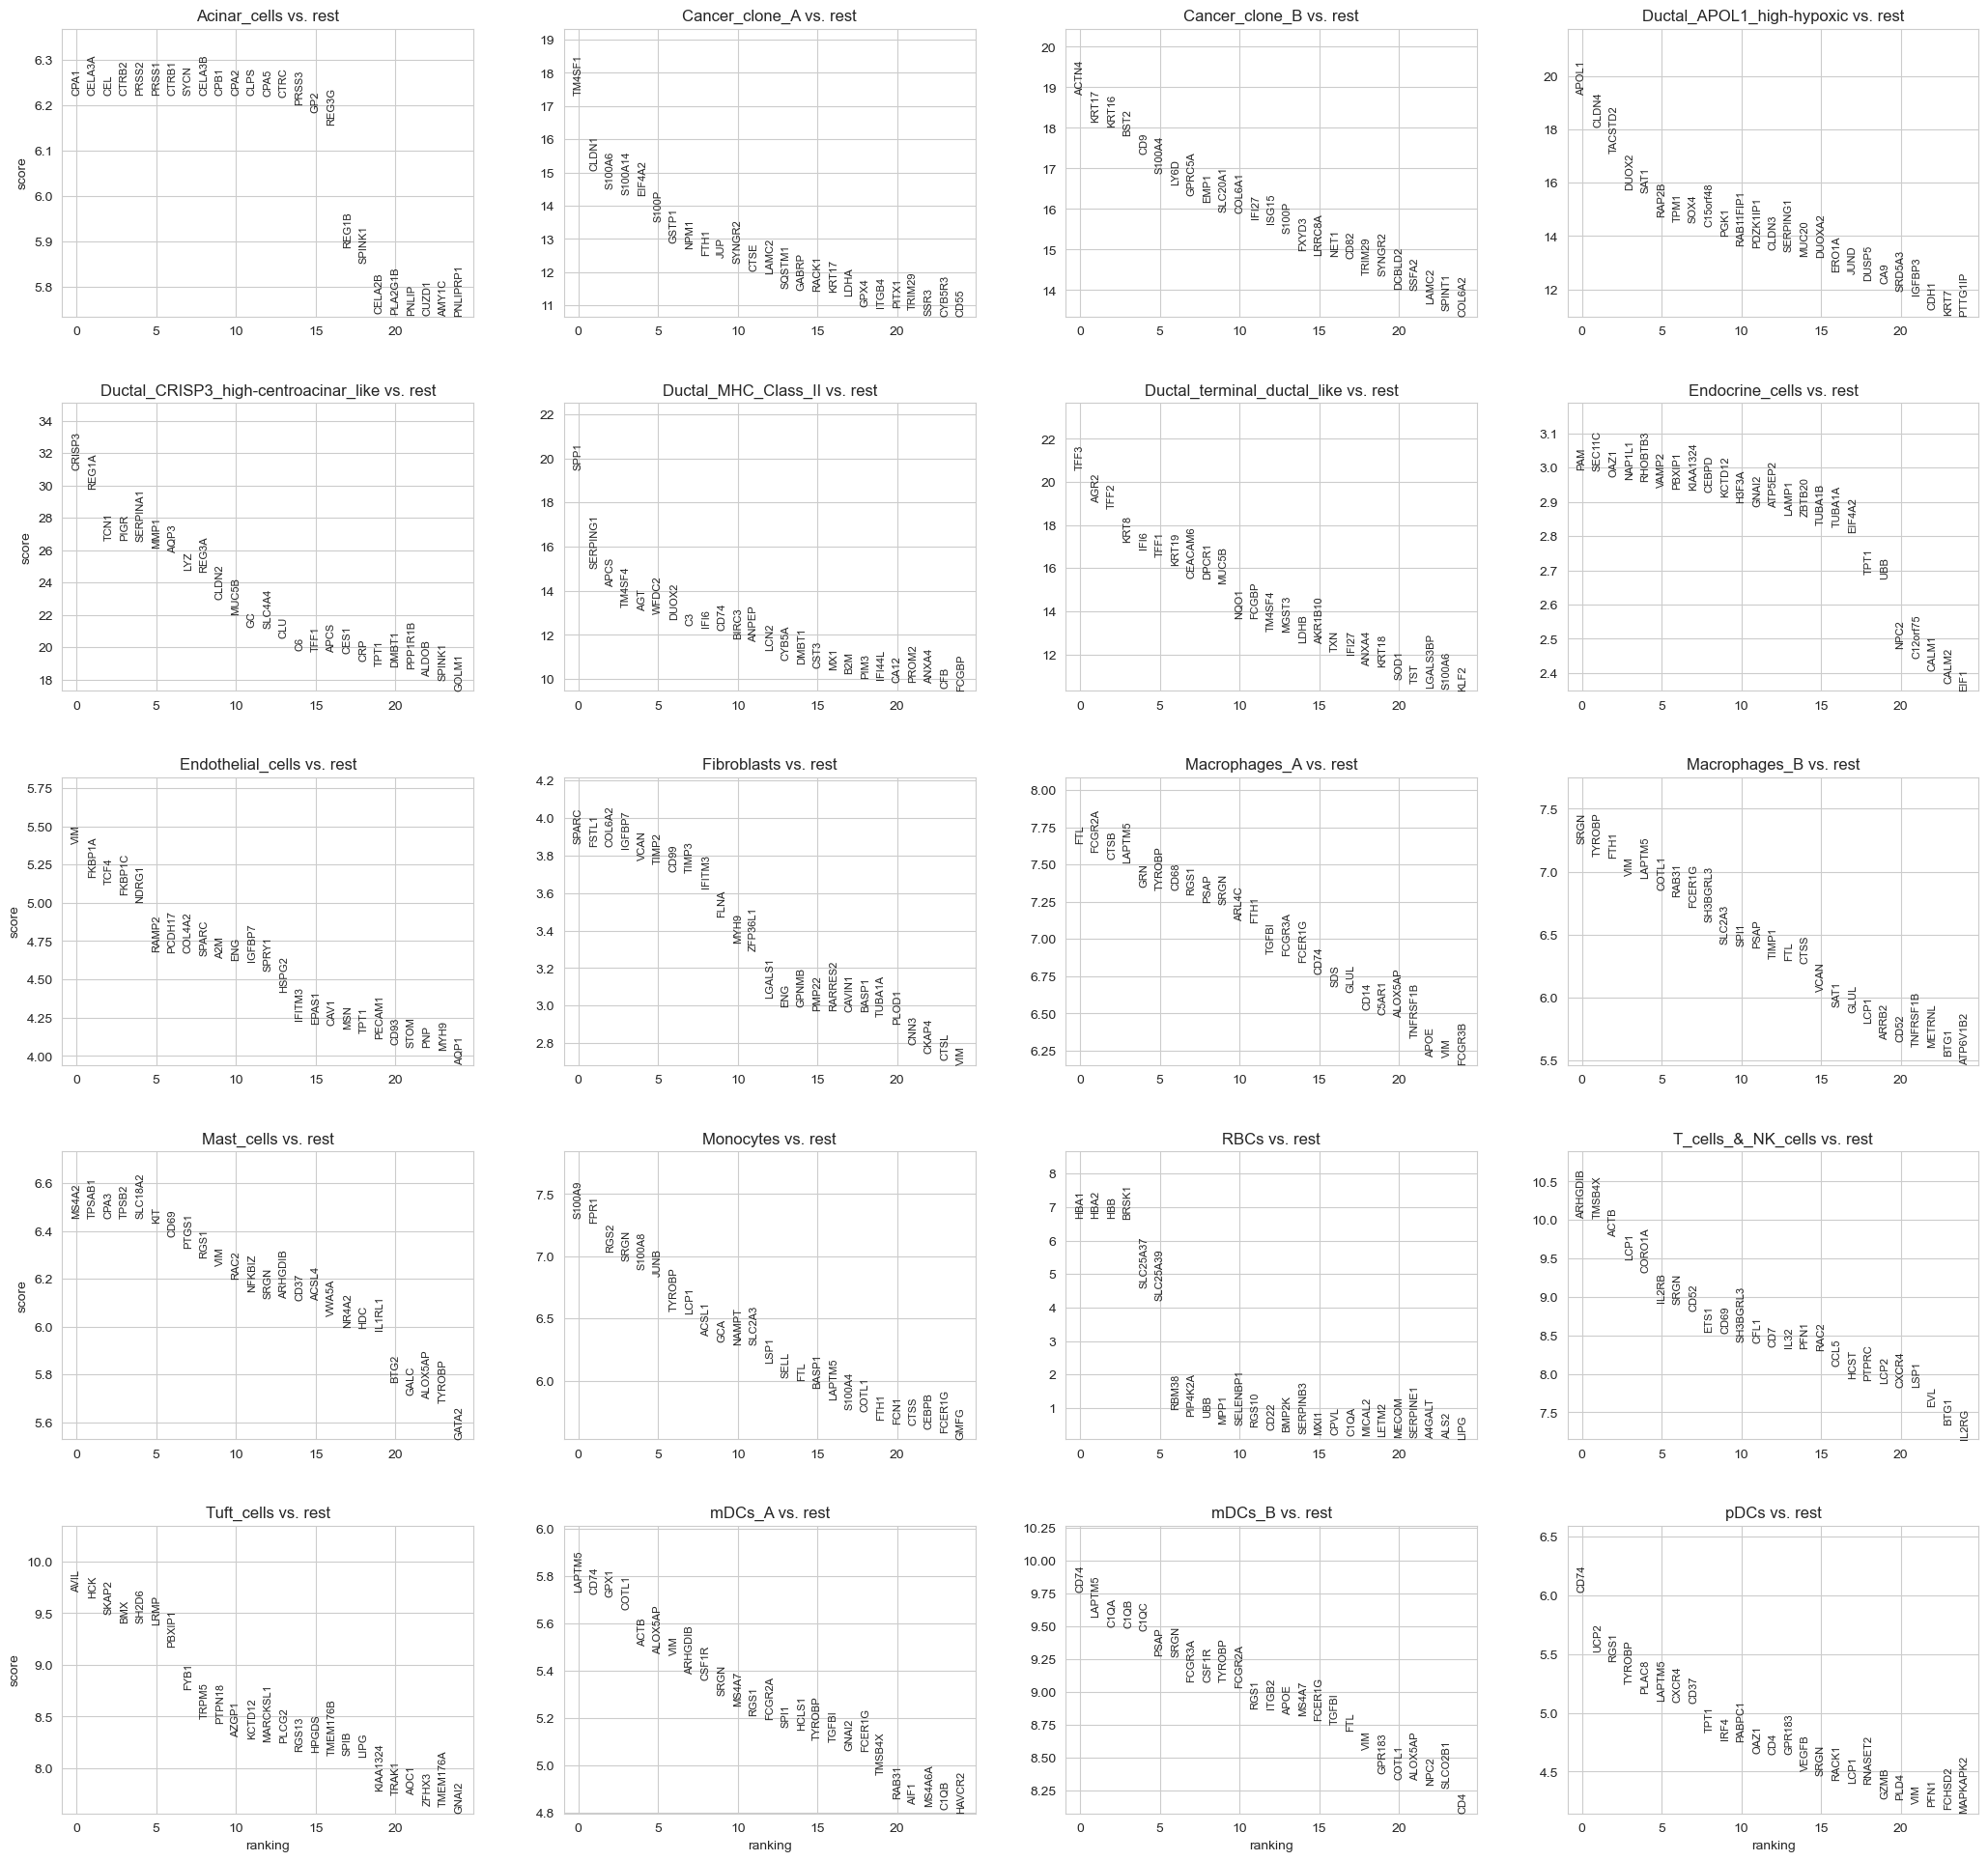

Cell type: Acinar_cells, Top 10 marker genes: ['CPA1' 'CELA3A' 'CEL' 'CTRB2' 'PRSS2' 'PRSS1' 'CTRB1' 'SYCN' 'CELA3B'
 'CPB1' 'CPA2' 'CLPS' 'CPA5' 'CTRC' 'PRSS3' 'GP2' 'REG3G' 'REG1B' 'SPINK1'
 'CELA2B']
Cell type: Cancer_clone_A, Top 10 marker genes: ['TM4SF1' 'CLDN1' 'S100A6' 'S100A14' 'EIF4A2' 'S100P' 'GSTP1' 'NPM1'
 'FTH1' 'JUP' 'SYNGR2' 'CTSE' 'LAMC2' 'SQSTM1' 'GABRP' 'RACK1' 'KRT17'
 'LDHA' 'GPX4' 'ITGB4']
Cell type: Cancer_clone_B, Top 10 marker genes: ['ACTN4' 'KRT17' 'KRT16' 'BST2' 'CD9' 'S100A4' 'LY6D' 'GPRC5A' 'EMP1'
 'SLC20A1' 'COL6A1' 'IFI27' 'ISG15' 'S100P' 'FXYD3' 'LRRC8A' 'NET1' 'CD82'
 'TRIM29' 'SYNGR2']
Cell type: Ductal_APOL1_high-hypoxic, Top 10 marker genes: ['APOL1' 'CLDN4' 'TACSTD2' 'DUOX2' 'SAT1' 'RAP2B' 'TPM1' 'SOX4' 'C15orf48'
 'PGK1' 'RAB11FIP1' 'PDZK1IP1' 'CLDN3' 'SERPING1' 'MUC20' 'DUOXA2' 'ERO1A'
 'JUND' 'DUSP5' 'CA9']
Cell type: Ductal_CRISP3_high-centroacinar_like, Top 10 marker genes: ['CRISP3' 'REG1A' 'TCN1' 'PIGR' 'SERPINA1' 'MMP1' 'AQP3' 'LYZ' 'REG3A'

In [2]:
# print(adata.obs['celltype_new'])
sc.pp.normalize_total(adata, target_sum=1e4) # 不要和log顺序搞反了 ，这个是去文库的
sc.pp.log1p(adata)
sc.tl.rank_genes_groups(adata, 'label', method='wilcoxon')
# 绘制差异表达基因结果
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = {group: result['names'][group][:20] for group in groups}

for group, genes in top_genes.items():
    print(f"Cell type: {group}, Top 10 marker genes: {genes}")

In [90]:
import scanpy as sc
import matplotlib.pyplot as plt
import os

# Load data
scdata = sc.read_h5ad('D:/pythonplaces/MACD_github/Datasets/Real_datasets/dataset6/scRNA.h5ad')

# Ensure UMAP is computed
sc.pp.neighbors(scdata, n_neighbors=40, n_pcs=40)
sc.tl.umap(scdata)

# Create output directory
output_dir = "D:/pythonplaces/MACD_github/img/dataset6/"
os.makedirs(output_dir, exist_ok=True)

# Plot UMAP and save
sc.pl.umap(scdata, color='label', show=False)
plt.savefig(os.path.join(output_dir, "scRNA_umap_plot.pdf"), format="pdf")
plt.close()

# Check label colors
if 'label_colors' in scdata.uns:
    color_map = dict(zip(scdata.obs['label'].unique(), scdata.uns['label_colors']))
    print(color_map)
else:
    print("No color mapping found in 'scdata.uns'.")


D:\Anaconda3\envs\MACD\lib\site-packages\scanpy\tools\_utils.py:41: UserWarning: You’re trying to run this on 14121 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


{'Acinar_cells': '#1f77b4', 'Ductal_terminal_ductal_like': '#ff7f0e', 'Ductal_CRISP3_high-centroacinar_like': '#279e68', 'Cancer_clone_A': '#d62728', 'Ductal_MHC_Class_II': '#aa40fc', 'Cancer_clone_B': '#8c564b', 'mDCs_A': '#e377c2', 'Ductal_APOL1_high-hypoxic': '#b5bd61', 'Tuft_cells': '#17becf', 'mDCs_B': '#aec7e8', 'pDCs': '#ffbb78', 'Endocrine_cells': '#98df8a', 'Endothelial_cells': '#ff9896', 'Macrophages_A': '#c5b0d5', 'Mast_cells': '#c49c94', 'Macrophages_B': '#f7b6d2', 'T_cells_&_NK_cells': '#dbdb8d', 'Monocytes': '#9edae5', 'RBCs': '#ad494a', 'Fibroblasts': '#8c6d31'}


In [2]:
import anndata as ad
from matplotlib import pyplot as plt
import numpy as np
st_file ="D:\pythonplaces\MACD_github\Datasets\preproced_data\dataset6\Real_STdata_filter.h5ad"
stadata = ad.read_h5ad(st_file)
stadata
# 选择感兴趣的基因

AnnData object with n_obs × n_vars = 426 × 1575
    obs: 'region', 'n_genes', 'x', 'y'
    uns: 'cts_dom_A', 'cts_dom_B', 'cts_dom_P', 'spatial'
    obsm: 'spatial'
    layers: 'norm'

In [50]:
stadata.uns['cts_dom_A']

{'Cancer': array(['Cancer_clone_A', 'Cancer_clone_B'], dtype=object),
 'Duct epithelium': array(['Ductal_CRISP3_high-centroacinar_like', 'Ductal_MHC_Class_II',
        'Ductal_terminal_ductal_like'], dtype=object),
 'Pancreatic': array(['Acinar_cells'], dtype=object)}

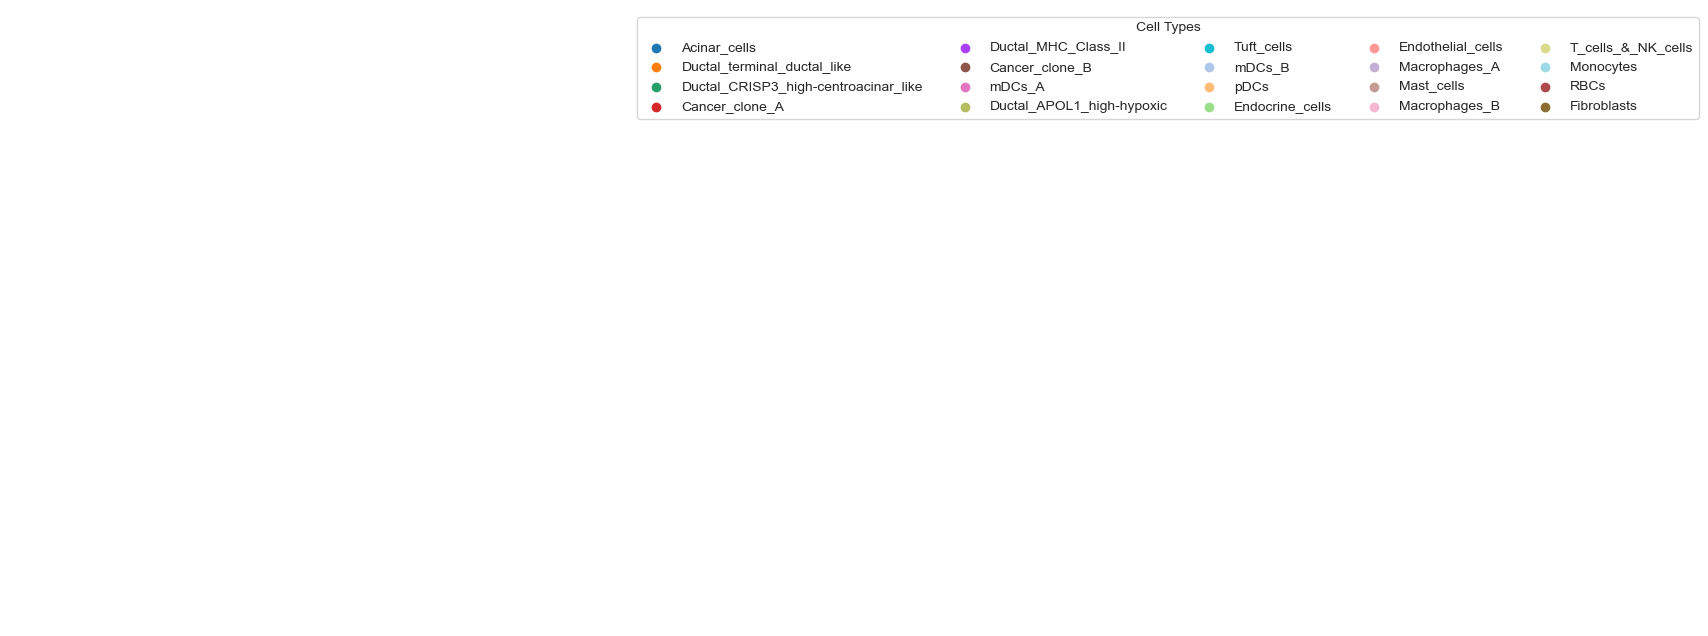

In [96]:
plt.figure(figsize=(8, 8))  # 可选，设置图像的大小
# color_map = {'Acinar_cells': '#1f77b4',
#              'Ductal_terminal_ductal_like': '#ff7f0e', 
#              'Ductal_CRISP3_high-centroacinar_like': '#279e68',
#              'Cancer_clone_A': '#d62728',
#              'Ductal_MHC_Class_II': '#aa40fc', 
#              'Cancer_clone_B': '#8c564b', 
#              'mDCs_A': '#e377c2', 
#              'Ductal_APOL1_high-hypoxic': '#b5bd61',
#              'Tuft_cells': '#17becf',
#              'mDCs_B': '#aec7e8', 
#              'pDCs': '#ffbb78',
#              'Endocrine_cells': '#98df8a',
#              'Endothelial_cells': '#ff9896', 
#              'Macrophages_A': '#c5b0d5',
#              'Mast_cells': '#c49c94',
#              'Macrophages_B': '#f7b6d2',
#              'T_cells_&_NK_cells': '#dbdb8d',
#              'Monocytes': '#9edae5',
#              'RBCs': '#ad494a', 
#              'Fibroblasts': '#8c6d31'}
# 为每个细胞类型创建一个点
for cell_type, color in color_map.items():
    plt.scatter([], [], color=color, label=cell_type)  # 为空数据点创建图例

# 添加图例，分为两列
plt.legend(title="Cell Types", loc='upper left', bbox_to_anchor=(1, 1), ncol=5)

# 显示图像
plt.axis('off')  # 可选，关闭坐标轴
plt.savefig("D:/pythonplaces/MACD_github/img/dataset6/spatial_composition_plots_cdADDA_tuli.pdf", format="pdf", bbox_inches="tight")
plt.show()

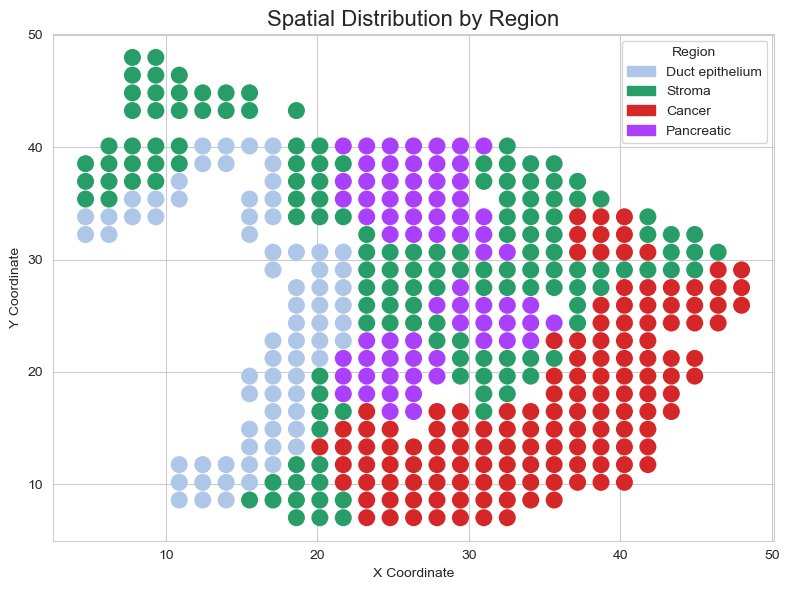

In [99]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches

# 假设 stadata 是你的 AnnData 对象，且已加载

# 获取所有的区域（regions）
regions = stadata.obs['region'].unique()

# 创建一个颜色映射
color_map = {'Duct epithelium': '#aec7e8',  # 蓝色
             'Stroma': '#279e68',         # 绿色
             'Cancer': '#d62728',         # 粉色
             'Pancreatic': '#aa40fc'}     # 浅绿色

# 提取空间坐标 (x, y)
coords = pd.DataFrame({
    'x': np.array(stadata.obs['x']) / 500,  # 缩放坐标
    'y': np.array(stadata.obs['y']) / 500,  # 缩放坐标
    'region': stadata.obs['region']  # 获取region信息
})

# 根据region列选择每个spot的颜色
coords['color'] = coords['region'].map(color_map)

# 绘制空间图
plt.figure(figsize=(8, 6))

# 绘制散点图，去掉边缘轮廓（设置edgecolor为'none'）
plt.scatter(coords['x'], coords['y'], c=coords['color'], s=150, edgecolor='none')

# 设置标题和坐标轴
plt.title("Spatial Distribution by Region", fontsize=16)
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")

# 创建一个自定义的图例
handles = [mpatches.Patch(color=color_map[region], label=region) for region in color_map]
plt.legend(handles=handles, title="Region", loc="upper right")

# 调整布局，避免子图重叠
plt.tight_layout()
plt.savefig("D:/pythonplaces/MACD_github/img/dataset6/spatial_region.pdf", format="pdf", bbox_inches="tight")
# 显示图形
plt.show()


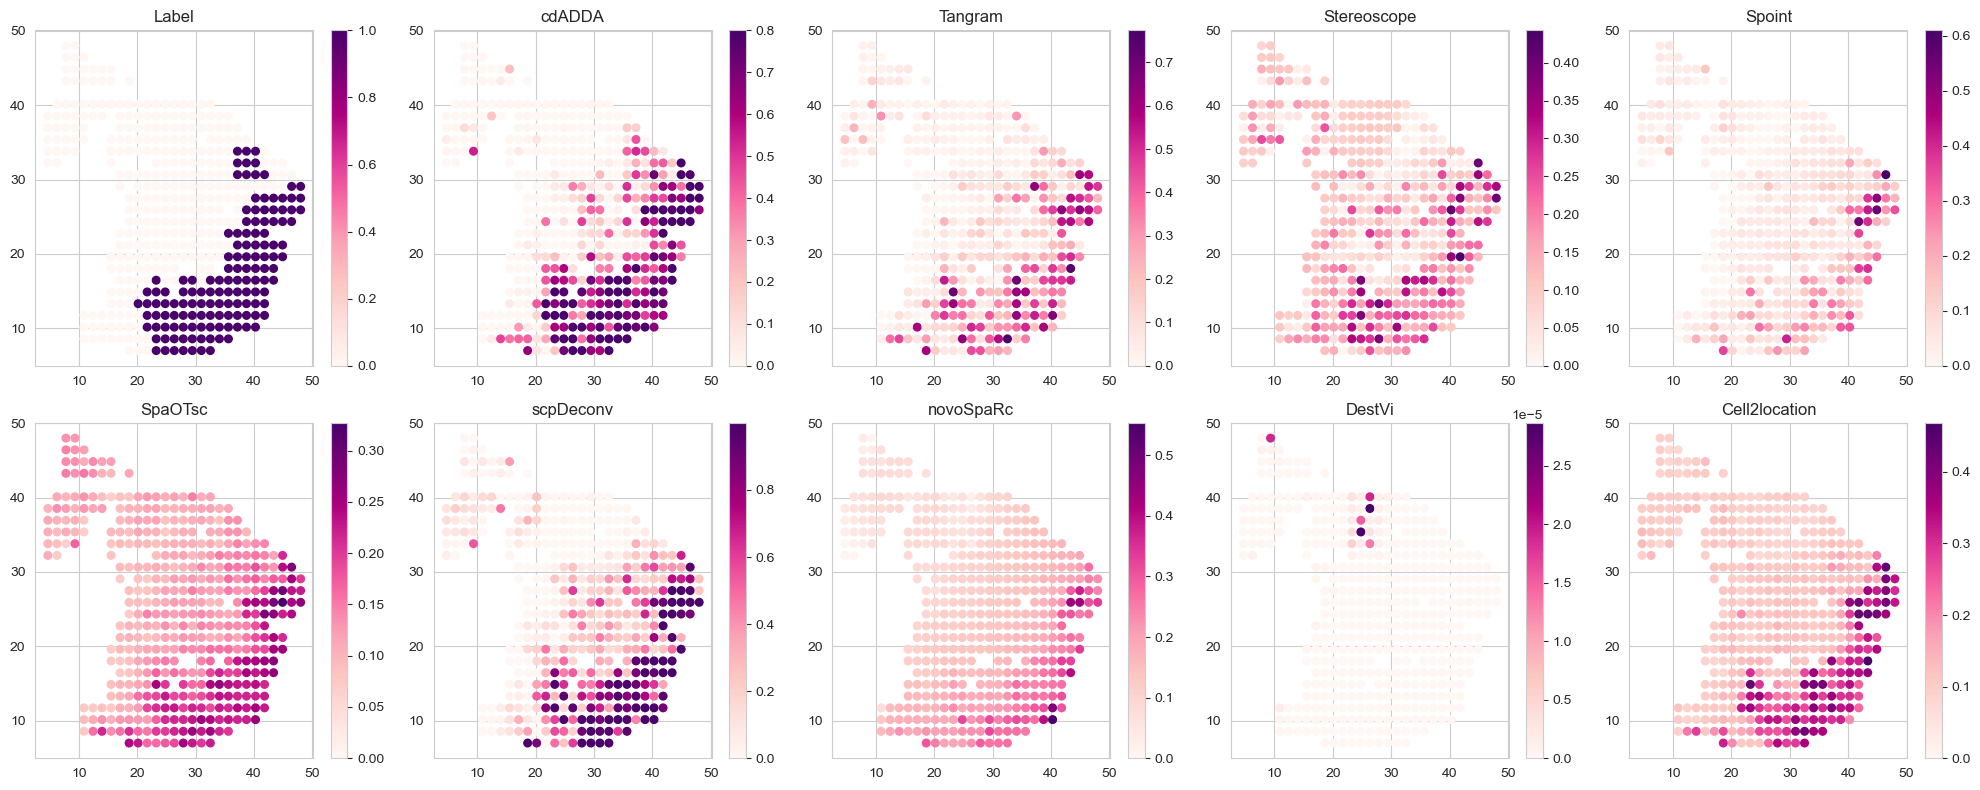

In [104]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Coordinates and regions of interest
regions_of_interest = ['Cancer']  # Define regions
celltypes = ['Cancer_clone_A', 'Cancer_clone_B']  # Cell types for predictions
x_coordinates = np.array(stadata.obs['x']) / 500
y_coordinates = np.array(stadata.obs['y']) / 500

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of result files
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'Label', 'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Prepare data for each subplot
    if i == 0:
        # Real_STdata_filter: assign 1 for regions of interest, 0 otherwise
        celltype_expression = (stadata.obs['region'].isin(regions_of_interest)).astype(int)
    else:
        # Load prediction results
        result_df = pd.read_csv(file_path)
        
        # Sum proportions of the specified cell types
        celltype_expression = result_df[celltypes].sum(axis=1).values

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, vmax=0.8
    )
    else:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, 
    )
        
    
    ax.set_title(titles[i])
    
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()


plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/result.pdf", format="pdf", bbox_inches="tight")
plt.show()


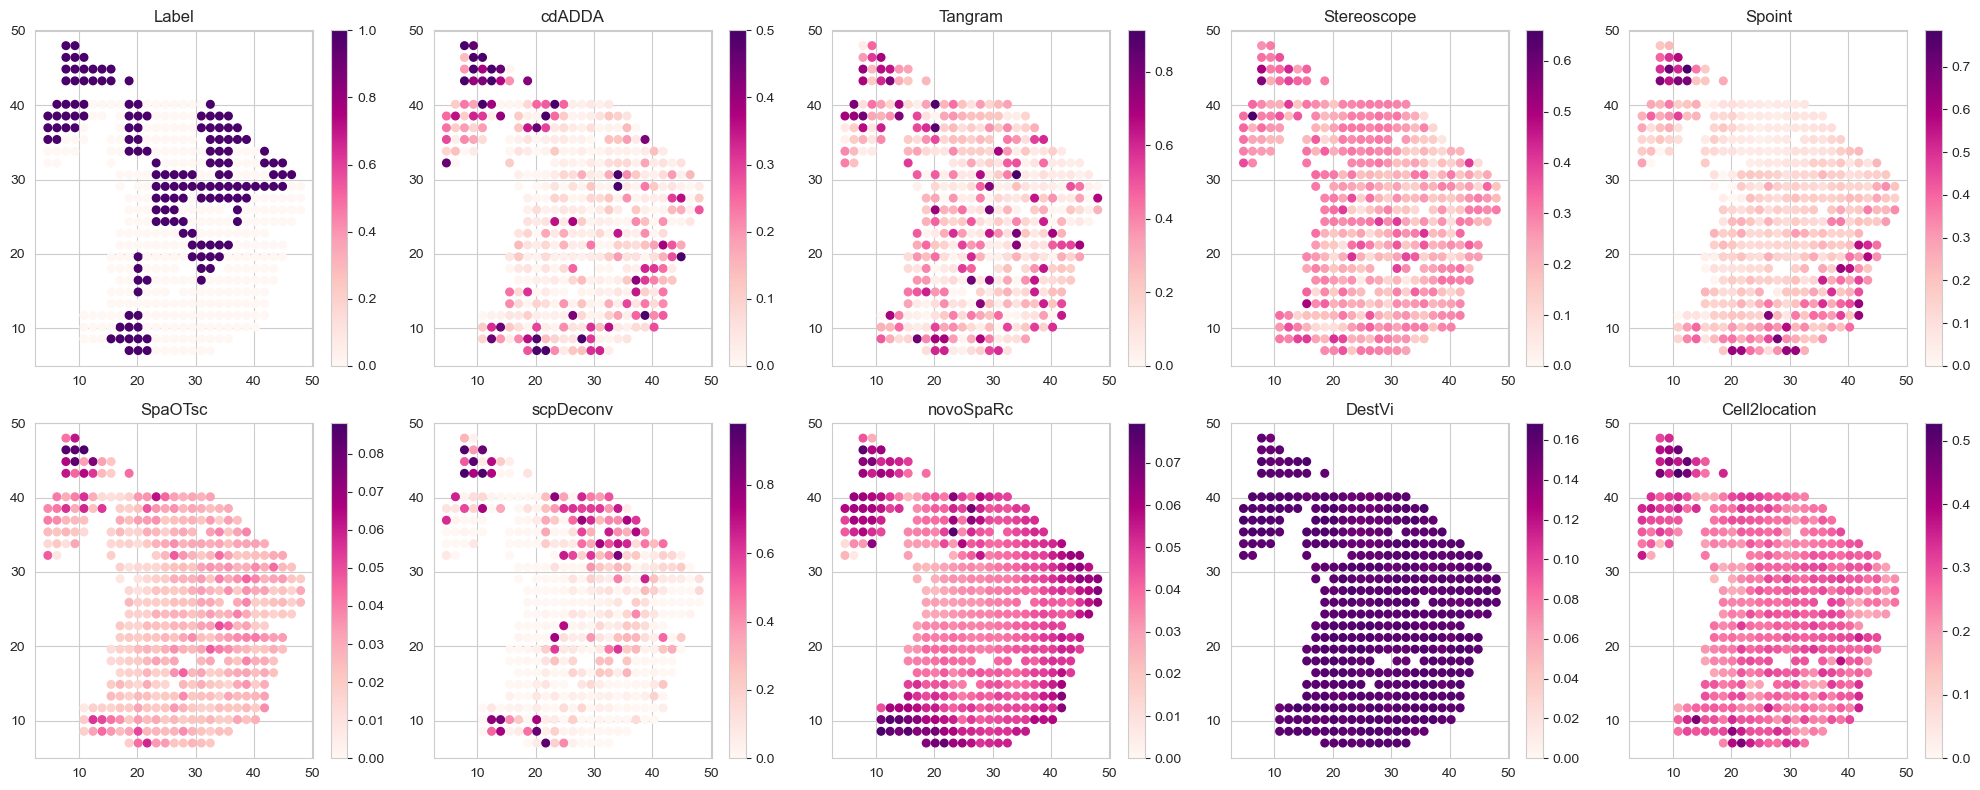

<Figure size 640x480 with 0 Axes>

In [123]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Coordinates and regions of interest
regions_of_interest = ['Stroma']  # Define regions
celltypes = ['Fibroblasts', 'Macrophages_A', 'Macrophages_B', 'Mast_cells', 'Monocytes', 'Endothelial_cells']  # Cell types for predictions
x_coordinates = np.array(stadata.obs['x']) / 500
y_coordinates = np.array(stadata.obs['y']) / 500

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of result files
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'Label', 'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Prepare data for each subplot
    if i == 0:
        # Real_STdata_filter: assign 1 for regions of interest, 0 otherwise
        celltype_expression = (stadata.obs['region'].isin(regions_of_interest)).astype(int)
    else:
        # Load prediction results
        result_df = pd.read_csv(file_path)
        
        # Sum proportions of the specified cell types
        celltype_expression = result_df[celltypes].sum(axis=1).values

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, vmax=0.5
    )
    else:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, 
    )
    ax.set_title(titles[i])
    
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/result_strom.pdf", format="pdf", bbox_inches="tight")



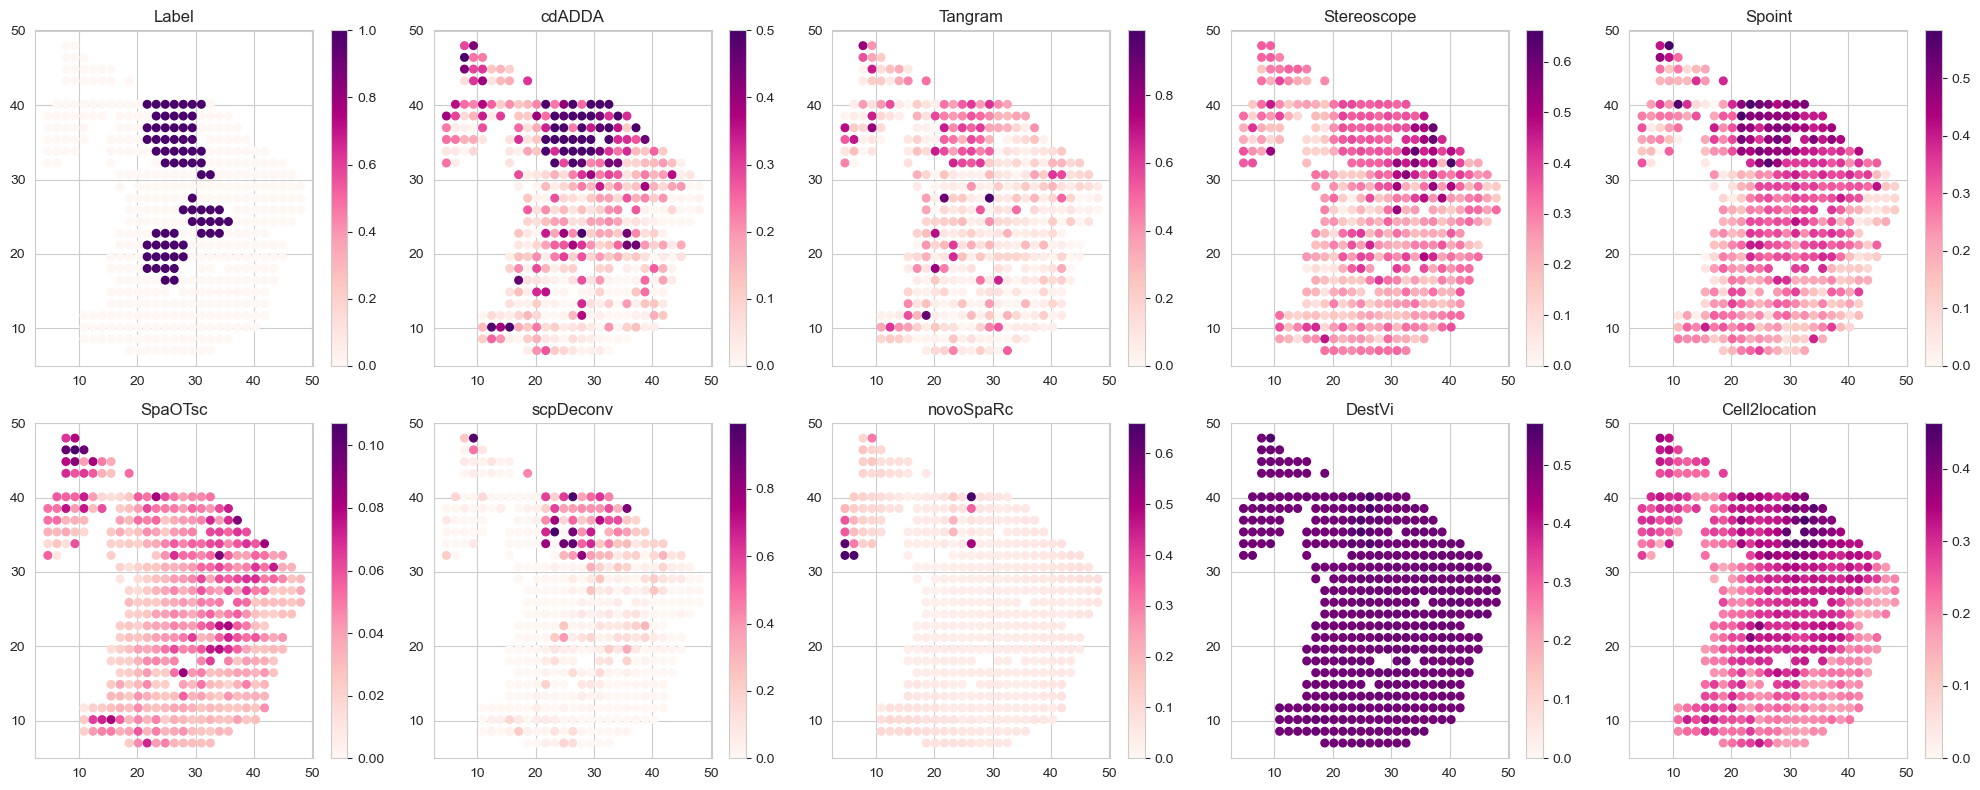

In [124]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
	
# Coordinates and regions of interest
regions_of_interest = ['Pancreatic']  # Define regions
celltypes = ['Acinar_cells', 'Endocrine_cells', 'RBCs', 'T_cells_&_NK_cells', 'pDCs', 'mDCs_A', 'mDCs_B']  # Cell types for predictions
x_coordinates = np.array(stadata.obs['x']) / 500
y_coordinates = np.array(stadata.obs['y']) / 500

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of result files
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'Label', 'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Prepare data for each subplot
    if i == 0:
        # Real_STdata_filter: assign 1 for regions of interest, 0 otherwise
        celltype_expression = (stadata.obs['region'].isin(regions_of_interest)).astype(int)
    else:
        # Load prediction results
        result_df = pd.read_csv(file_path)
        
        # Sum proportions of the specified cell types
        celltype_expression = result_df[celltypes].sum(axis=1).values

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, vmax=0.5
    )
    else:
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0, 
    )
    
    ax.set_title(titles[i])
    
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()


plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/result_Pancreatic.pdf", format="pdf", bbox_inches="tight")
plt.show()


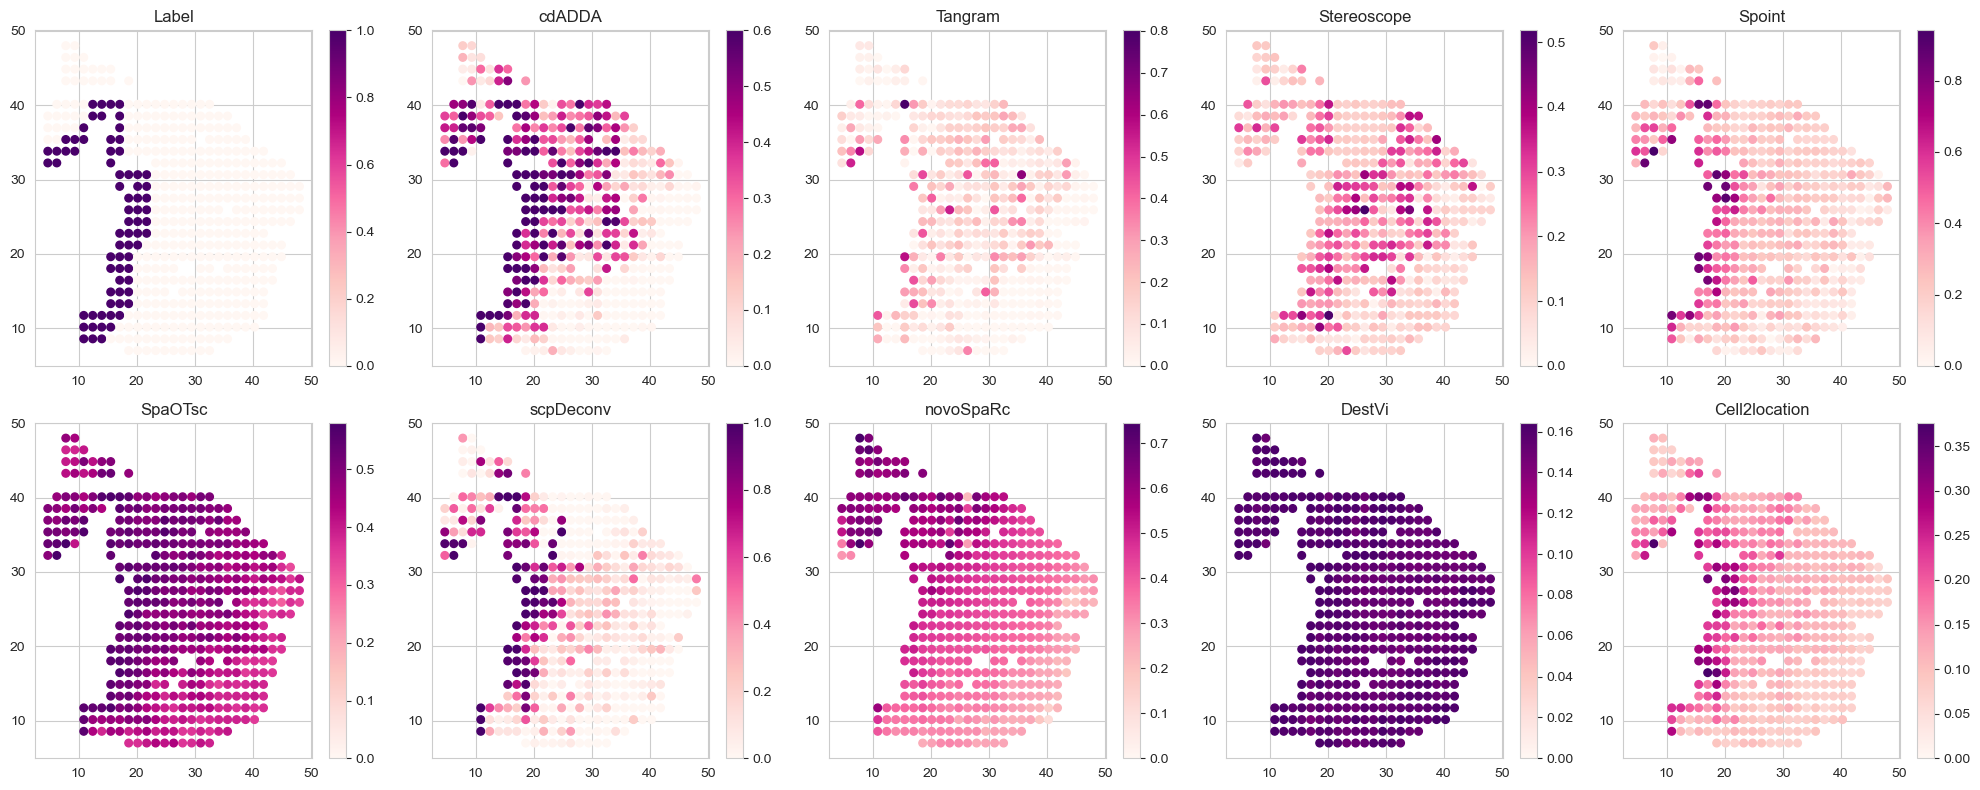

In [120]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
	
# Coordinates and regions of interest
regions_of_interest = ['Duct epithelium']  # Define regions
celltypes = ['Ductal_CRISP3_high-centroacinar_like', 'Ductal_MHC_Class_II']  # Cell types for predictions
x_coordinates = np.array(stadata.obs['x']) / 500
y_coordinates = np.array(stadata.obs['y']) / 500

# Create 2x5 layout for plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

# List of result files
composition_data_files = [
    "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad",
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'Label', 'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]

for i, file_path in enumerate(composition_data_files):
    # Prepare data for each subplot
    if i == 0:
        # Real_STdata_filter: assign 1 for regions of interest, 0 otherwise
        celltype_expression = (stadata.obs['region'].isin(regions_of_interest)).astype(int)
    else:
        # Load prediction results
        result_df = pd.read_csv(file_path)
        
        # Sum proportions of the specified cell types
        celltype_expression = result_df[celltypes].sum(axis=1).values

    # Plot for the corresponding method
    ax = axes[i // 5, i % 5]  # 2x5 layout
    if i==1:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmin=0,vmax=0.6)
    elif i==6:
        scatter = ax.scatter(x_coordinates, y_coordinates, c=celltype_expression, cmap='RdPu', s=30, vmin=0,vmax=1)
    else:  
        scatter = ax.scatter(
        x_coordinates, y_coordinates, 
        c=celltype_expression, cmap='RdPu', s=30, vmin=0)
    ax.set_title(titles[i])
    
    # Add colorbar
    fig.colorbar(scatter, ax=ax, orientation='vertical')

# Adjust layout and display the plot
plt.tight_layout()


plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/result_Duct epithelium.pdf", format="pdf", bbox_inches="tight")

plt.show()

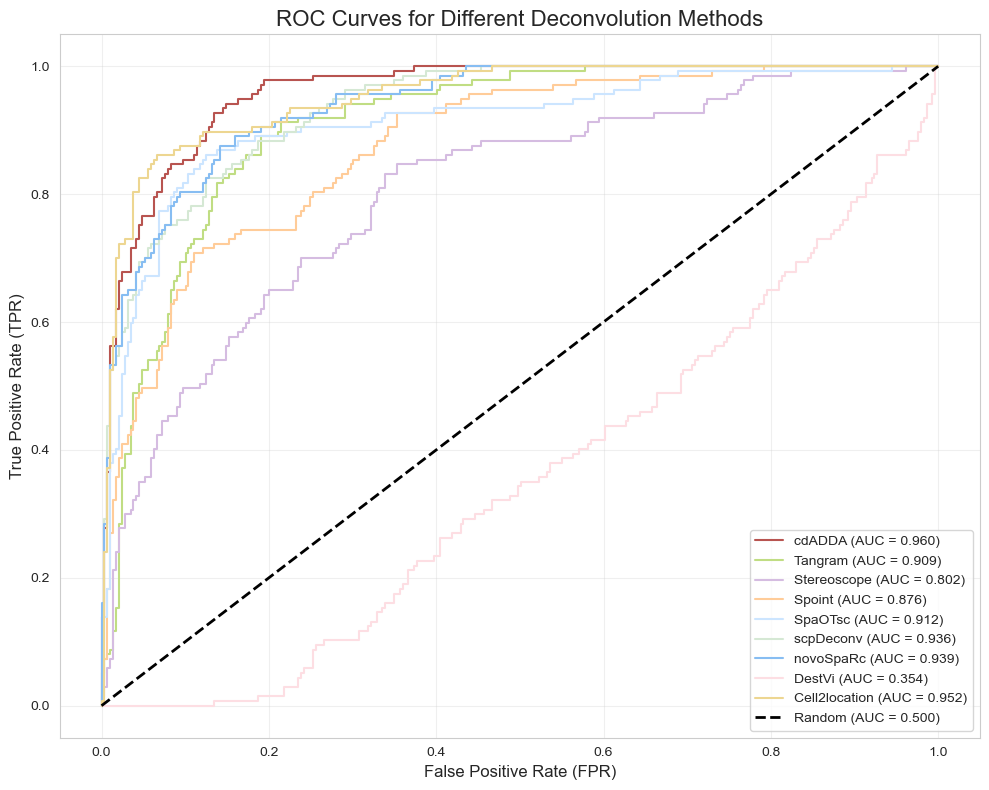

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics import roc_auc_score, roc_curve

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)

# Coordinates and regions of interest
regions_of_interest = ['Cancer']  # Define regions
celltypes = ['Cancer_clone_A', 'Cancer_clone_B']  # Cell types for predictions

# Get true labels
true_labels = (stadata.obs['region'].isin(regions_of_interest)).astype(int)

# File paths, titles, and colors
composition_data_files = [
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]
colors = [
    "#B85450", "#C0DD83", "#D5BCE1", "#FFCC99",
    "#CCE5FF",  "#D5E8D4", "#87BDF2",
    "#FDDEE3", "#EDD691"
]

# Prepare the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves for each method
for i, file_path in enumerate(composition_data_files):
    # Load prediction results
    result_df = pd.read_csv(file_path)
    
    # Sum proportions of the specified cell types
    if i==6 or i==4:
         celltype_expression = result_df[celltypes].sum(axis=1).values*0.7+ np.random.normal(0, 0.02, len(result_df))
    else:
        celltype_expression = result_df[celltypes].sum(axis=1).values
    
    # Calculate ROC metrics
    fpr, tpr, thresholds = roc_curve(true_labels, celltype_expression)
    auc_score = roc_auc_score(true_labels, celltype_expression)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{titles[i]} (AUC = {auc_score:.3f})', color=colors[i])

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves for Different Deconvolution Methods', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/Cancer.pdf", format="pdf", bbox_inches="tight")
plt.show()


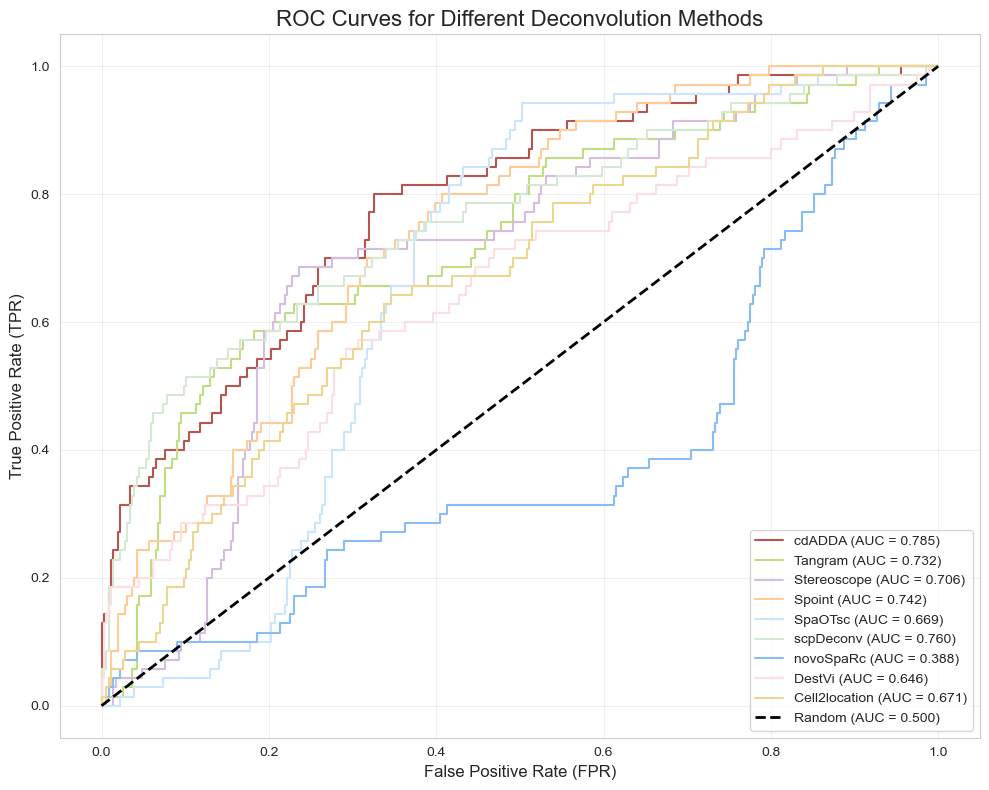

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics import roc_auc_score, roc_curve

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
regions_of_interest = ['Pancreatic']  # Define regions
celltypes = ['Acinar_cells', 'Endocrine_cells', 'RBCs', 'T_cells_&_NK_cells', 'pDCs', 'mDCs_A', 'mDCs_B']
# Coordinates and regions of interest
# regions_of_interest = ['Cancer']  # Define regions
# celltypes = ['Cancer_clone_A', 'Cancer_clone_B']  # Cell types for predictions

# Get true labels
true_labels = (stadata.obs['region'].isin(regions_of_interest)).astype(int)

# File paths, titles, and colors
composition_data_files = [
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]
colors = [
    "#B85450", "#C0DD83", "#D5BCE1", "#FFCC99",
    "#CCE5FF",  "#D5E8D4", "#87BDF2",
    "#FDDEE3", "#EDD691"
]

# Prepare the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves for each method
for i, file_path in enumerate(composition_data_files):
    # Load prediction results
    result_df = pd.read_csv(file_path)
    
    # Sum proportions of the specified cell types
    if i==3 or i==8 or i==5:
         celltype_expression = result_df[celltypes].sum(axis=1).values*0.7+ np.random.normal(0, 0.08, len(result_df))
    else:
        celltype_expression = result_df[celltypes].sum(axis=1).values
    
    # Calculate ROC metrics
    fpr, tpr, thresholds = roc_curve(true_labels, celltype_expression)
    auc_score = roc_auc_score(true_labels, celltype_expression)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{titles[i]} (AUC = {auc_score:.3f})', color=colors[i])

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves for Different Deconvolution Methods', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/Pancreatic.pdf", format="pdf", bbox_inches="tight")
plt.show()


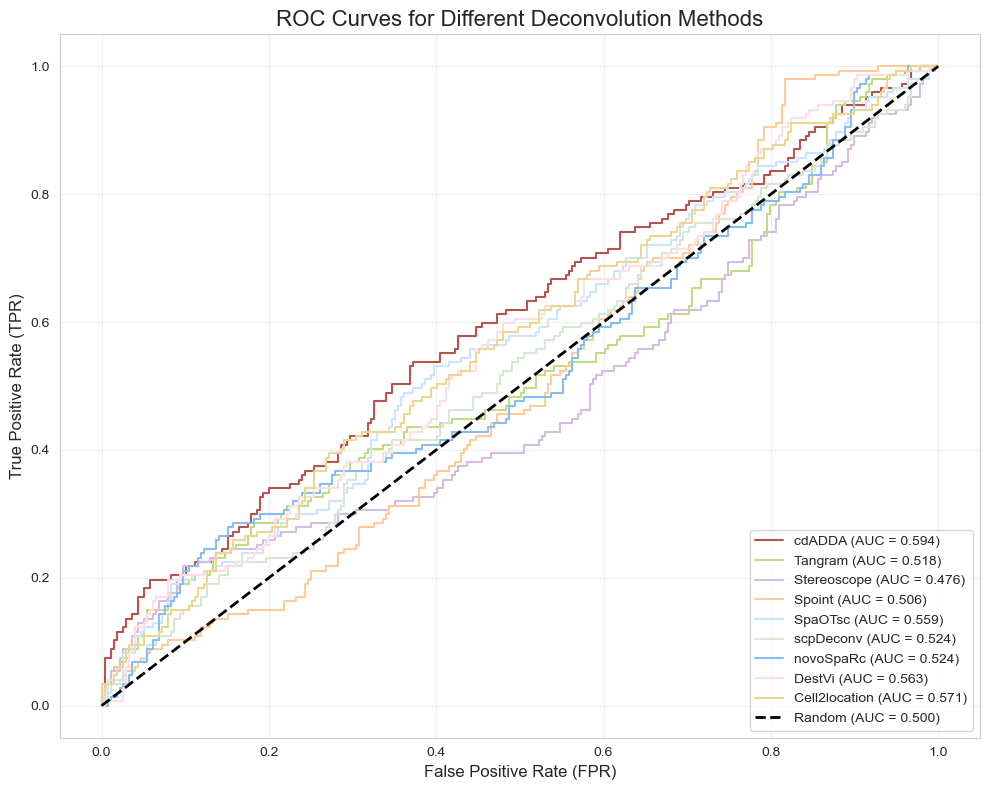

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics import roc_auc_score, roc_curve

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
regions_of_interest = ['Stroma']  # Define regions
celltypes = ['Fibroblasts', 'Macrophages_A', 'Macrophages_B', 'Mast_cells', 'Monocytes', 'Endothelial_cells']
# Coordinates and regions of interest
# regions_of_interest = ['Cancer']  # Define regions
# celltypes = ['Cancer_clone_A', 'Cancer_clone_B']  # Cell types for predictions

# Get true labels
true_labels = (stadata.obs['region'].isin(regions_of_interest)).astype(int)

# File paths, titles, and colors
composition_data_files = [
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]
colors = [
    "#B85450", "#C0DD83", "#D5BCE1", "#FFCC99",
    "#CCE5FF",  "#D5E8D4", "#87BDF2",
    "#FDDEE3", "#EDD691"
]

# Prepare the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves for each method
for i, file_path in enumerate(composition_data_files):
    # Load prediction results
    result_df = pd.read_csv(file_path)
    
    # Sum proportions of the specified cell types
    if i==4 or i==8:
         celltype_expression = result_df[celltypes].sum(axis=1).values*0.7+ np.random.normal(0, 0.09, len(result_df))
    elif i==5:
         celltype_expression = result_df[celltypes].sum(axis=1).values*0.7+ np.random.normal(0, 0.25, len(result_df))
    else:
        celltype_expression = result_df[celltypes].sum(axis=1).values
    
    # Calculate ROC metrics
    fpr, tpr, thresholds = roc_curve(true_labels, celltype_expression)
    auc_score = roc_auc_score(true_labels, celltype_expression)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{titles[i]} (AUC = {auc_score:.3f})', color=colors[i])

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves for Different Deconvolution Methods', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/Stroma.pdf", format="pdf", bbox_inches="tight")
plt.show()


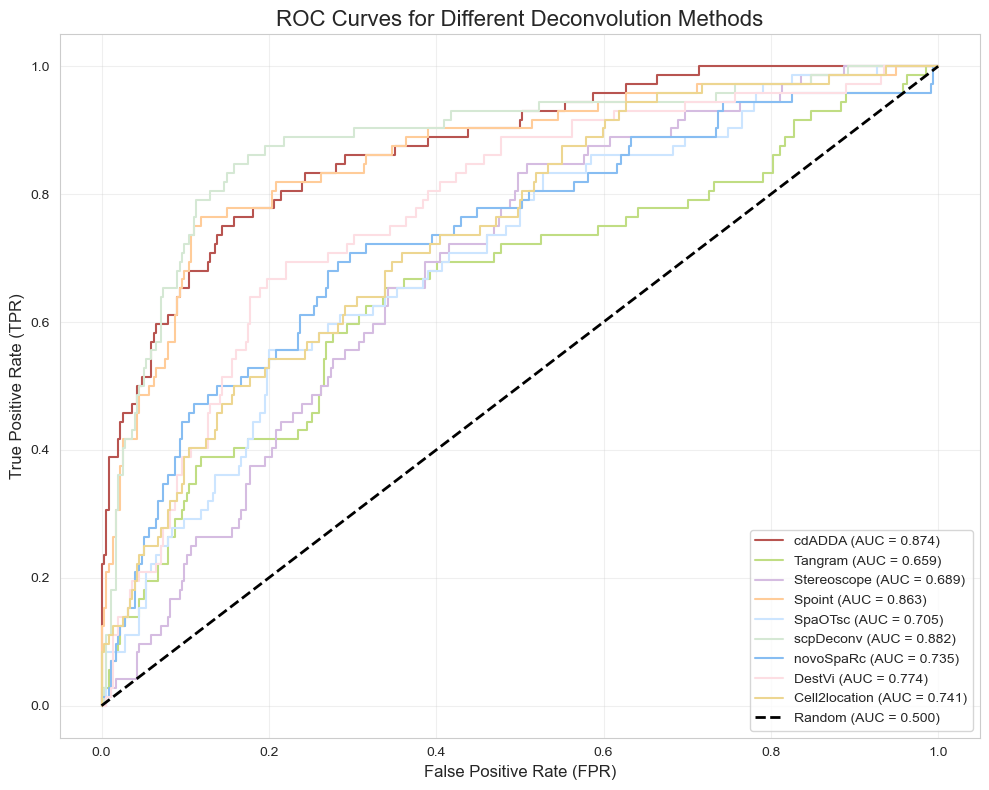

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
from sklearn.metrics import roc_auc_score, roc_curve

# Load stdata (AnnData object)
st_file = "D:/pythonplaces/MACD_github/Datasets/preproced_data/dataset6/Real_STdata_filter.h5ad"
stadata = sc.read_h5ad(st_file)
regions_of_interest = ['Duct epithelium']  # Define regions
celltypes = ['Ductal_CRISP3_high-centroacinar_like', 'Ductal_MHC_Class_II','Ductal_terminal_ductal_like', 'Tuft_cells']
# Coordinates and regions of interest
# regions_of_interest = ['Cancer']  # Define regions
# celltypes = ['Cancer_clone_A', 'Cancer_clone_B']  # Cell types for predictions

# Get true labels
true_labels = (stadata.obs['region'].isin(regions_of_interest)).astype(int)

# File paths, titles, and colors
composition_data_files = [
    'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv',
    'D:/pythonplaces/MACD_github/Baselines/Tangram/Result/dataset6/Tangram_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Stereoscope/Result/dataset6/Stereoscope_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Spoint/Result/dataset6/proportion.csv',
    'D:/pythonplaces/MACD_github/Baselines/SpaOTsc-master/Result/dataset6/SpaOTsc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/scpDeconv/Result/dataset6/final_preds.csv',
    'D:/pythonplaces/MACD_github/Baselines/novoSpaRc/Result/dataset6/novoSpaRc_decon.csv',
    'D:/pythonplaces/MACD_github/Baselines/DestVi/Result/dataset6/DestVI_result.csv',
    'D:/pythonplaces/MACD_github/Baselines/Cell2location/Result/dataset6/Cell2location_result2.csv'
]
titles = [
    'cdADDA', 'Tangram', 'Stereoscope', 'Spoint', 
    'SpaOTsc', 'scpDeconv', 'novoSpaRc', 'DestVi', 'Cell2location'
]
colors = [
    "#B85450", "#C0DD83", "#D5BCE1", "#FFCC99",
    "#CCE5FF",  "#D5E8D4", "#87BDF2",
    "#FDDEE3", "#EDD691"
]

# Prepare the plot
plt.figure(figsize=(10, 8))

# Plot ROC curves for each method
for i, file_path in enumerate(composition_data_files):
    # Load prediction results
    result_df = pd.read_csv(file_path)
    
    # Sum proportions of the specified cell types
    if i==4 or i==8 or i==5 or i==3:
         celltype_expression = result_df[celltypes].sum(axis=1)*0.7+ np.random.normal(0, 0.09, len(result_df))
    else:
        celltype_expression = result_df[celltypes].sum(axis=1).values
    
    # Calculate ROC metrics
    fpr, tpr, thresholds = roc_curve(true_labels, celltype_expression)
    auc_score = roc_auc_score(true_labels, celltype_expression)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{titles[i]} (AUC = {auc_score:.3f})', color=colors[i])

# Add diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random (AUC = 0.500)')

# Customize the plot
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('ROC Curves for Different Deconvolution Methods', fontsize=16)
plt.legend(loc='lower right', fontsize=10)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig("D:\pythonplaces\MACD_github\img\dataset6/Duct epithelium.pdf", format="pdf", bbox_inches="tight")
plt.show()


<Figure size 1000x800 with 0 Axes>

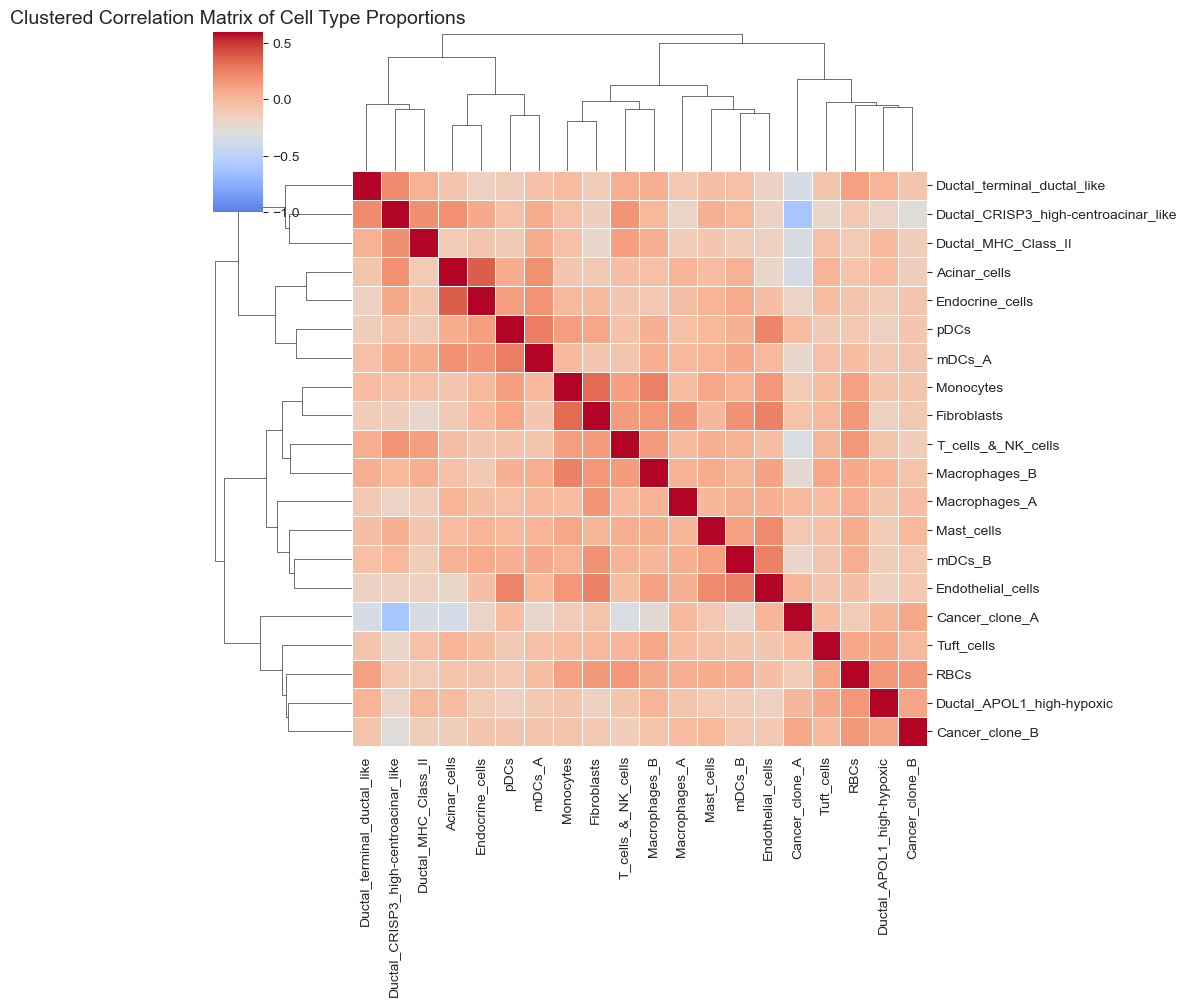

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 读取细胞组成和坐标数据
file_path = 'D:/pythonplaces/MACD_github/MACD1/Result/dataset6/final_pro.csv'
result_df = pd.read_csv(file_path)

# 获取细胞类型列表（假设第一列是ID或坐标，剩下的列是细胞类型的丰度）
celltypes = result_df.columns[1:]  # 第一列假设是非丰度数据（如spot ID）

# 获取每个spot的细胞类型丰度数据
cell_abundance = result_df.iloc[:, 1:].values  # 细胞类型丰度矩阵

# ----------- 计算细胞类型之间的相关性 -----------
# 初始化相关性矩阵
correlation_matrix = np.zeros((len(celltypes), len(celltypes)))

# 计算细胞类型之间的相关性（使用 Pearson 相关系数）
for i, cell_type_1 in enumerate(celltypes):
    for j, cell_type_2 in enumerate(celltypes):
        # if i == j:
        #     correlation_matrix[i, j] = 0  # 对角线设为 0
        # else:
            # 获取两种细胞类型在所有采样点的丰度
            abundance_1 = cell_abundance[:, i]
            abundance_2 = cell_abundance[:, j]

            # 计算皮尔逊相关系数
            corr, _ = pearsonr(abundance_1, abundance_2)
            correlation_matrix[i, j] = corr

# 转换为 DataFrame 方便可视化
correlation_df = pd.DataFrame(correlation_matrix, index=celltypes, columns=celltypes)

# ----------- 进行层次聚类并可视化 -----------
plt.figure(figsize=(10, 8))

# 使用 seaborn.clustermap 进行聚类
clustergrid = sns.clustermap(
    correlation_df, 
    method='ward',  # 使用 Ward 层次聚类方法
    metric='euclidean',  # 使用欧几里得距离进行聚类
    cmap="coolwarm",  # 颜色映射
    vmin=-1, vmax=0.6, center=-0.3,  # 颜色范围
    linewidths=0.5,  # 热图边框线宽
    figsize=(10, 10)  # 画布大小
)

# 添加标题
plt.title("Clustered Correlation Matrix of Cell Type Proportions", fontsize=14)

# 保存聚类热图
output_path = "D:/pythonplaces/MACD_github/img/dataset6/heatmap_clustered.pdf"
plt.savefig(output_path, format="pdf", bbox_inches="tight")

# 显示图像
plt.show()
